### Assignment 2

## Part 1

In [1]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')
library(dslabs)
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
data(divorce_margarine)
str(divorce_margarine)

'data.frame':	10 obs. of  3 variables:
 $ divorce_rate_maine              : num  5 4.7 4.6 4.4 4.3 4.1 4.2 4.2 4.2 4.1
 $ margarine_consumption_per_capita: num  8.2 7 6.5 5.3 5.2 4 4.6 4.5 4.2 3.7
 $ year                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009


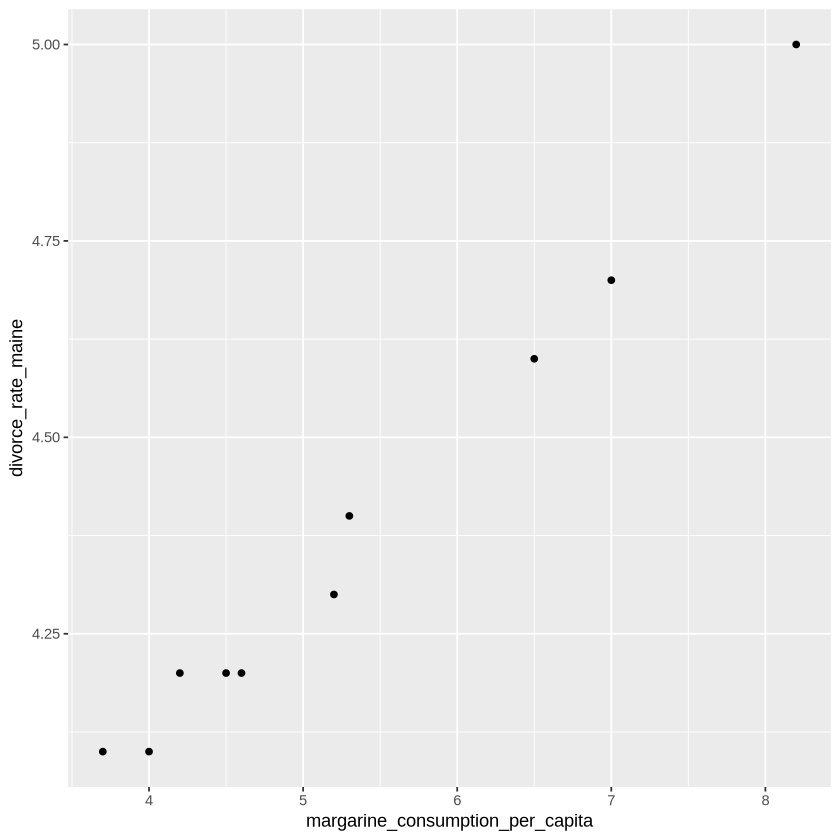

In [3]:
ggplot(divorce_margarine,
       aes(x = margarine_consumption_per_capita,
           y = divorce_rate_maine)) +
    geom_point()

In [4]:
cor.test(divorce_margarine$margarine_consumption_per_capita, divorce_margarine$divorce_rate_maine)


	Pearson's product-moment correlation

data:  divorce_margarine$margarine_consumption_per_capita and divorce_margarine$divorce_rate_maine
t = 23.055, df = 8, p-value = 1.33e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9676666 0.9983038
sample estimates:
      cor 
0.9925585 


There seems to be a correlation between the variables because r is close 1 (0.993), which tracks with the visual from the plot

According to the model there is a positive correlation between an increase in margarine sales and divorce rates. Although there is a correlation, this does not necesarrily point towards a causation, so it is not possible to conclude from this data alone if an increase  in  the preference for margarine would lead to skyrocketing divorce rate.

## Part two

In [5]:
install.packages('car')
library(car)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

also installing the dependencies ‘backports’, ‘cowplot’, ‘Deriv’, ‘modelr’, ‘microbenchmark’, ‘broom’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘survival’, ‘boot’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘nnet’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [6]:
data(GSSvocab)
str(GSSvocab)

'data.frame':	28867 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...


In [7]:
#Filter by year 1978
data1978 <- GSSvocab %>%
    filter(year == 1978) %>%
    na.exclude(data1978)
str(data1978)

'data.frame':	1477 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...
 - attr(*, "na.action")= 'exclude' Named int [1:55] 179 193 258 329 346 389 390 408 429 451 ...
  ..- attr(*, "names")= chr [1:55] "1978.179" "1978.193" "1978.258" "1978.329" ...


In [8]:
#chech how many unique scores in the year variable
unique(data1978$year)

[1] 1978
20 Levels: 1978 1982 1984 1987 1988 1989 1990 1991 1993 1994 1996 1998 ... 2016

Is a person’s score on the vocabulary test (‘vocab’) significantly impacted by their level of education (‘educ’)? 
Visualize the relationship in a plot and build a model. 

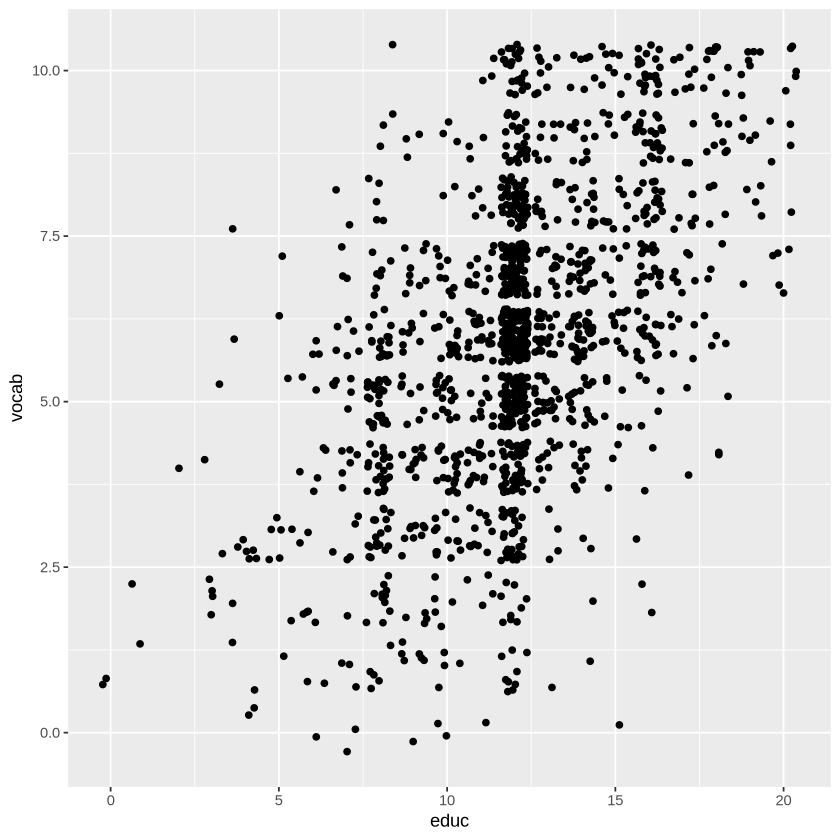

In [9]:
#visualize relationship
ggplot(data1978,
       aes(x = educ,
           y = vocab)) +
    geom_point(position = 'jitter')

In [10]:
cor.test(data1978$educ, data1978$vocab)


	Pearson's product-moment correlation

data:  data1978$educ and data1978$vocab
t = 24.443, df = 1475, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4996008 0.5722586
sample estimates:
      cor 
0.5369246 


In [11]:
#making a linear model
vocab_model <- lm(vocab ~ educ, data1978)
summary(vocab_model)


Call:
lm(formula = vocab ~ educ, data = data1978)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1233 -1.1608  0.0542  1.0917  5.6243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.23567    0.19957   6.192  7.7e-10 ***
educ         0.39251    0.01606  24.443  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.885 on 1475 degrees of freedom
Multiple R-squared:  0.2883,	Adjusted R-squared:  0.2878 
F-statistic: 597.5 on 1 and 1475 DF,  p-value: < 2.2e-16


In [12]:
#There a positive correlation between education level and vocabulary because the p-value is significant, but the value of r-squared 
#indicates that the linear model I have created only accounts for about 29% of the variance from of the data from model

Whether a person is the native of an English-speaking country (‘nativeBorn’) could potentially
have an impact on the size of their vocabulary. Visualize the relationship and add the predictor
to the model. Briefly explain the results.

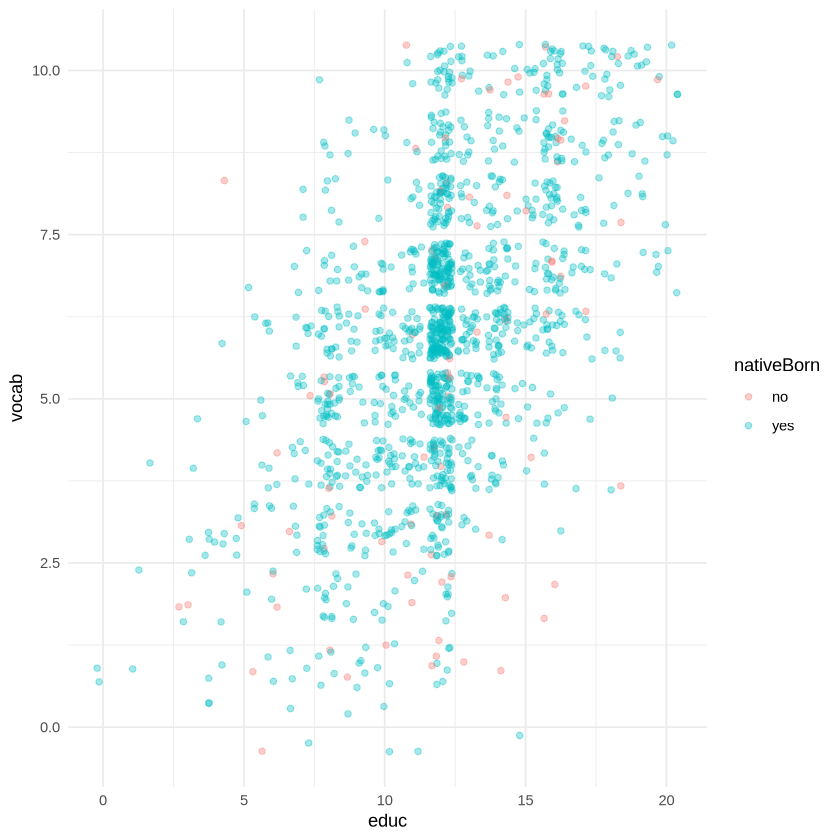

In [23]:
# visualizing relationship between education, vocab and nativeborn
ggplot(data1978,
       aes(x = educ,
           y = vocab, 
           color = nativeBorn)) +
    geom_point(position = 'jitter',
              alpha= 0.35)+
theme_minimal()

In [41]:
#Add predictor to the model
vocabmodel1 <- lm(vocab ~ educ, data1978)
vocabmodel2 <- lm(vocab ~ educ + nativeBorn, data1978)

In [25]:
summary(vocabmodel2)


Call:
lm(formula = vocab ~ educ + nativeBorn, data = data1978)

Residuals:
   Min     1Q Median     3Q    Max 
-7.162 -1.200  0.015  1.231  5.803 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.62803    0.27651   2.271  0.02327 *  
educ           0.39222    0.01601  24.499  < 2e-16 ***
nativeBornyes  0.65032    0.20551   3.164  0.00159 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.879 on 1474 degrees of freedom
Multiple R-squared:  0.2931,	Adjusted R-squared:  0.2921 
F-statistic: 305.6 on 2 and 1474 DF,  p-value: < 2.2e-16


In [ ]:
# The p-value is less than 0.05 so there is a relationship between nativeborn and vocab

Does  a  person's  level  of  education  depend  on  whether they  are  a  native  of  the  country?

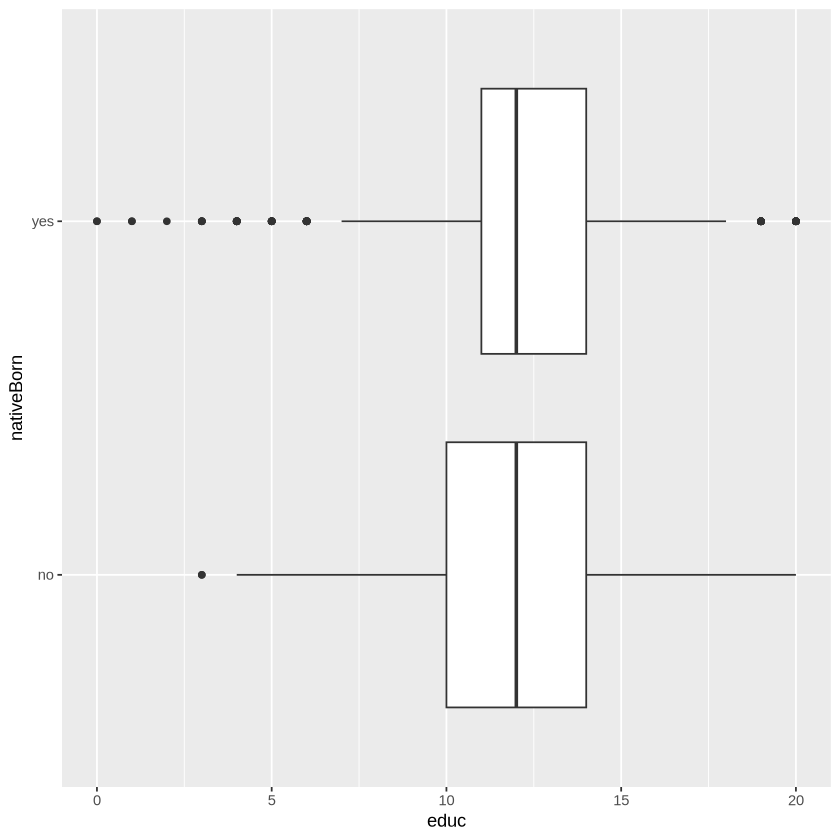

In [36]:
ggplot(data1978,
       aes(x = educ,
           y = nativeBorn)) +
geom_boxplot()

In [ ]:
#The means look to be the same, which tells me that there is no significant relationship between nativeborn and education level

In [38]:
vocabmodel3 <- lm(vocab ~ educ * nativeBorn, data1978)

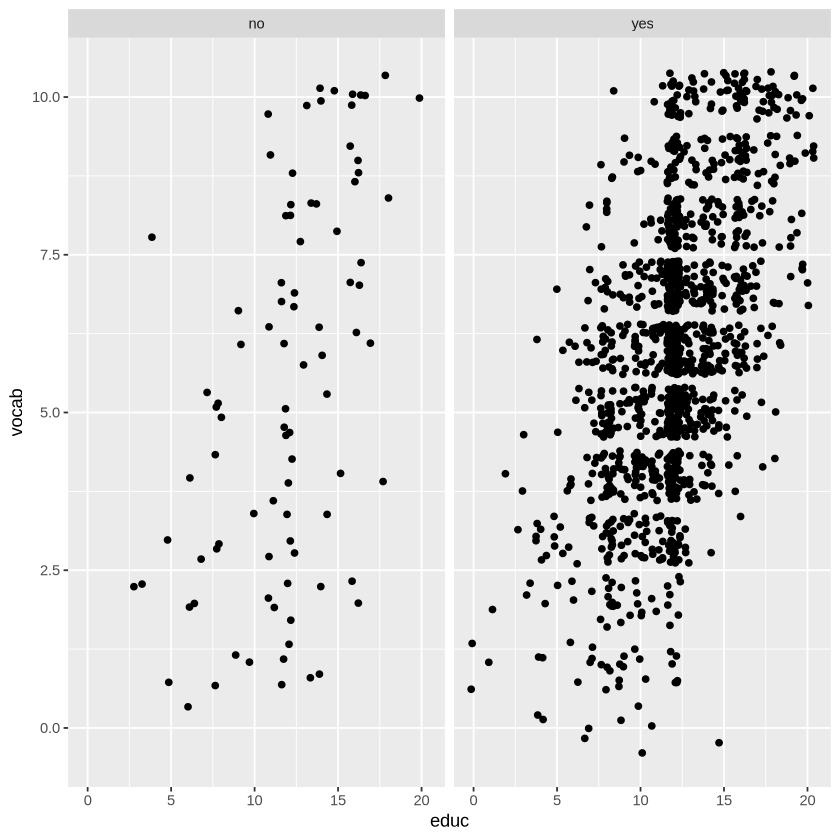

In [34]:
ggplot(data1978,
       aes(x= educ,
           y = vocab)) +
    geom_point(position = 'jitter') +
    facet_wrap(~nativeBorn)

In [30]:
summary(vocabmodel3)


Call:
lm(formula = vocab ~ educ * nativeBorn, data = data1978)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1554 -1.2049  0.0149  1.2347  5.9857 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.35394    0.68780   0.515    0.607    
educ                0.41510    0.05496   7.553 7.45e-14 ***
nativeBornyes       0.95000    0.71855   1.322    0.186    
educ:nativeBornyes -0.02501    0.05745  -0.435    0.663    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.88 on 1473 degrees of freedom
Multiple R-squared:  0.2932,	Adjusted R-squared:  0.2917 
F-statistic: 203.7 on 3 and 1473 DF,  p-value: < 2.2e-16


In [ ]:
# The p-value  for nativeborn and educ is too high, which confirms that there is no significant relationship between the level of education and wether they are 
#nativeborn, which mean that it doesn't make sense to add the interaction

In [42]:
anova(vocabmodel1, vocabmodel2, vocabmodel3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1475,5241.828,NA,NA,NA,NA
2,1474,5206.458,1,35.3707012,10.0082911,0.001590199
3,1473,5205.788,1,0.6695224,0.1894442,0.663443355


The second model is the best model, because the p-value is below 0.05 and it explains more of the 
variance than the firstbecause it has more predictors and therefor the r^2 value is higher.